# Introduction


<center>
<img src='https://drive.google.com/uc?id=1WuQxr_u8_ihWy8edmk75ZsLMVOxLN3Dy' width="700" height ="550" /><br>
</center>

이전부터 인공지능을 배우면 꼭 투수를 위한 모델을 만들어봐야지 하는 개인적인 바람으로 이 프로젝트를 시작하게 되었다.

이 프로젝트는 KBO 리그의 투수 데이터를 분석하여 예측 모델을 구축하고 그 성능을 평가하는 것을 목표로 한다. 다양한 머신러닝 모델을 활용해 투수의 ERA(평균자책점)와 타자별 승부 결과를 수치화 후 시각화하여 통찰을 도출한다. 프로젝트의 핵심은 선형 회귀 모델과 함께 랜덤 포레스트, 그래디언트 부스팅, XGBoost 모델을 기반으로 스태킹 앙상블 모델을 학습하고 지표를 비교한다. 스태킹 모델이 다른 개별 모델보다 뛰어난 성능을 보이는지 확인해보고 더 뛰어나다면 이를 바탕으로 특정 투수가 상대했었던 타자들과의 다음 승부 결과를 예측하는 모델을 개발한다. 이 프로젝트는 투수를 위한 것이지 이전에 선배 분께서 하신 타자들의 통산 기록을 기반으로 타자를 위한 인공지능 프로젝트와는 다르다.

이러한 모델은 야구 구단의 FA(자유계약선수) 시장과 트레이드 전략에 유용한 도구가 될 수 있다. 각 투수의 성과를 객관적으로 분석하고 향후 성적을 예측함으로써 구단은 보다 효율적인 선수 계약 및 영입 결정을 내릴 수 있다. 특히 특정 투수의 미래 ERA를 예측하는 기능은 FA 계약 시 선수의 가치를 재평가하는 데 도움이 되며, 타자별 승부 예측 모델은 상대 타자의 강약점을 미리 파악해 경기 전략 수립을 돕는다. 이러한 데이터 기반 접근은 구단이 더 경쟁력 있는 로스터를 구성하고 투자 대비 성과를 극대화하는 데 기여할 수 있을 것이다.

# Dataset Information

<img src='https://drive.google.com/uc?id=16hO40ef4kR5-aHoVZWXCgKd5-znPtazr'/>


스포키(SPORKI)의 스탯티즈(Statiz)는 한국 프로야구(KBO) 리그에 특화된 온라인 통계 플랫폼으로, 선수와 팀의 세부 성적 데이터를 비롯해 다양한 야구 통계를 제공한다. 이 사이트는 타자와 투수의 경기별 기록, 시즌 성적, 역대 기록을 포함한 광범위한 정보를 다루며, 세이버메트릭스 지표 같은 고급 통계도 포함되어 있다. 이 프로젝트에서 스탯티즈의 시즌 투구 데이터와 선수의 Play Log 데이터를 활용하였다.

## Columns in dataset ⚾

*   Rank: 선수 순위 <br>
*   Name: 선수 이름 <br>
*   Team: 소속 팀 <br>
*   WAR: 대체 선수 대비 기여도 <br>
*   G: 출전 경기 수 <br>
*   GS: 선발 출전 경기 수 <br>
*   GR: 구원 등판 경기 수 <br>
*   GF: 마무리 등판하여 끝낸 경기 수 <br>
*   CG: 완투 경기 수 <br>
*   SHO: 무실점 완봉 경기 수 <br>
*   W: 승리 경기 수 <br>
*   L: 패배 경기 수 <br>
*   S: 세이브 기록 수 <br>
*   HD: 홀드 기록 수 <br>
*   IP: 투구한 총 이닝 수 <br>
*   ER: 자책점 <br>
*   R: 총 실점 <br>
*   rRA: 조정된 실점 <br>
*   TBF: 상대 타자 수 <br>
*   H: 허용한 안타 수 <br>
*   2B: 허용한 2루타 수 <br>
*   3B: 허용한 3루타 수 <br>
*   HR: 허용한 홈런 수 <br>
*   BB: 허용한 볼넷 수 <br>
*   HP: 허용한 몸에 맞는 공 수 <br>
*   IB: 고의 4구 허용 수 <br>
*   SO: 삼진 수 <br>
*   ROE: 실책으로 인한 출루 수 <br>
*   BK: 보크 수 <br>
*   WP: 폭투 수 <br>
*   ERA: 9이닝 당 자책점 평균 <br>
*   RA9: 9이닝 당 허용 실점 <br>
*   rRA9: 조정된 9이닝 당 실점 <br>
*   rRA9pf: 경기장 특성 반영한 rRA9 <br>
*   FIP: 수비 영향 배제한 방어율 <br>
*   WHIP: 이닝 당 허용 출루 수 <br>
*   REs: 예상 실점 <br>
*   REa: 실제 실점 <br>
*   WPe: 예상 승수 <br>
*   WPa: 실제 승수 <br>



## 한글 패치

In [ ]:
# 폰트 설치
!apt-get -y install fonts-nanum-coding

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum-coding is already the newest version (2.5-3).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 폰트 경로 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_prop = fm.FontProperties(fname=font_path)

# 폰트 캐시 새로 고침
fm.fontManager.addfont(font_path)

# 폰트 설정
plt.rcParams['font.family'] = font_prop.get_name()

# 시즌 투구 기록 분석

크롤링한 스탯티즈의 시즌 투구 기록 데이터에는 선발 투수들의 지표만 있다. <br>
'선발 투수 ERA 예측' 목차 까지는 LG TWINS 임찬규 선수의 시즌 스탯을 활용하였다.

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import time
from io import StringIO

#크롤링하는 함수 정의
def scrape_pitching_data(base_url, start_year, end_year):
    all_data = []

    for year in range(start_year, end_year + 1):

        url = f"{base_url}&year={year}"
        response = requests.get(url)
        response.raise_for_status()

        soup = BeautifulSoup(response.text, 'html.parser')
        table = soup.find('table')

        if table:
            df = pd.read_html(StringIO(str(table)))[0]
            df['Year'] = year
            all_data.append(df)

        # 서버 과부하 방지
        time.sleep(1)

    # 하나의 데이터프레임으로 병합
    return pd.concat(all_data, ignore_index=True)

# statiz 데이터 크롤링
base_url = 'https://statiz.sporki.com/stats/?m=main&m2=pitching'
data = scrape_pitching_data(base_url, 2001, 2023)

print(data.head())
print(f"데이터프레임의 크기: {data.shape[0]}행, {data.shape[1]}열")


  Rank   Name  Team Sort▼   G  GS  GR  GF CG SHO  ... BK  WP   ERA   RA9  \
  Rank   Name  Team   WAR   G  GS  GR  GF CG SHO  ... BK  WP   ERA   RA9   
0    1  에르난데스  01 P  5.40  34  34   0   4  4   2  ...  0  16  3.89  4.24   
1    2    이승호  01 P  5.37  35  33   2   8  6   1  ...  0   6  3.55  4.12   
2    3    임창용  01 P  4.68  30  29   1   2  1   1  ...  1   2  3.90  4.29   
3    4    박석진  01 P  4.57  47  11  36  29  0   0  ...  0   2  2.98  3.38   
4    5    신윤호  01 P  4.37  70   4  66  52  0   0  ...  2  10  3.12  3.62   

   rRA9 rRA9pf   FIP  WHIP  WAR▼  Year  
   rRA9 rRA9pf   FIP  WHIP  WAR▼        
0  4.24   4.19  4.08  1.42  5.40  2001  
1  4.12   4.08  4.78  1.43  5.37  2001  
2  4.29   4.08  4.52  1.25  4.68  2001  
3  3.38   3.40  3.72  1.21  4.57  2001  
4  3.62   3.74  4.03  1.44  4.37  2001  

[5 rows x 38 columns]
데이터프레임의 크기: 524행, 38열


In [ ]:
print(data.columns)

MultiIndex([(  'Rank',   'Rank'),
            (  'Name',   'Name'),
            (  'Team',   'Team'),
            ( 'Sort▼',    'WAR'),
            (     'G',      'G'),
            (    'GS',     'GS'),
            (    'GR',     'GR'),
            (    'GF',     'GF'),
            (    'CG',     'CG'),
            (   'SHO',    'SHO'),
            (     'W',      'W'),
            (     'L',      'L'),
            (     'S',      'S'),
            (    'HD',     'HD'),
            (    'IP',     'IP'),
            (    'ER',     'ER'),
            (     'R',      'R'),
            (   'rRA',    'rRA'),
            (   'TBF',    'TBF'),
            (     'H',      'H'),
            (    '2B',     '2B'),
            (    '3B',     '3B'),
            (    'HR',     'HR'),
            (    'BB',     'BB'),
            (    'HP',     'HP'),
            (    'IB',     'IB'),
            (    'SO',     'SO'),
            (   'ROE',    'ROE'),
            (    'BK',     'BK'),
            ( 

In [ ]:
print("Data shape (rows, columns):", data.shape)

Data shape (rows, columns): (524, 38)


In [ ]:
columns_of_interest = ['Year', 'Name', 'ERA', 'IP', 'SO', 'BB', 'W', 'L','WHIP']
data = data[columns_of_interest].dropna()

# 열 이름을 분석에 적합하도록 변경
data.columns = ['Year', 'Name', 'ERA', 'Innings Pitched', 'Strikeouts', 'Walks', 'Wins', 'Losses','WHIP']

# 'Innings Pitched' 열을 숫자(float)로 변환하며, 변환 실패 시 NaN으로 처리
data['Innings Pitched'] = pd.to_numeric(data['Innings Pitched'], errors='coerce')

# 변환 후 NaN이 된 행을 제거
data = data.dropna(subset=['Innings Pitched'])

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


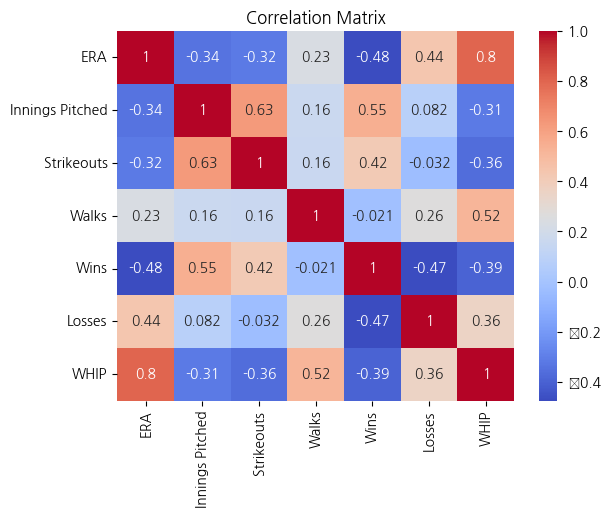

In [ ]:
import seaborn as sns

correlation_matrix = data[['ERA', 'Innings Pitched', 'Strikeouts', 'Walks', 'Wins', 'Losses','WHIP']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

최근 데이터를 가지고 학습한다.

In [ ]:
train_data = data[data['Year'] < 2024]  # 2001-2023년 데이터를 학습에 사용
future_data = data[data['Year'] == 2024]  # 2024년 데이터를 예측에 사용

# 'IP' 문자열 대신 'Innings Pitched' 숫자형 열 사용
X = train_data[['Year', 'Innings Pitched', 'Strikeouts', 'Walks', 'Wins', 'Losses','WHIP']]
y = train_data['ERA']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 데이터를 8:2 비율로 분할, random_state는 결과 재현성을 위해 설정



# 선발 투수 ERA 예측

target_pitcher_name에 예측할 선발 투수 이름을 입력하면 된다.

<ipython-input-57-2b3e27900d70>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_input['Year'] = X_input['Year'] + 1


Mean Squared Error: 0.19498098478020412
R-squared Score: 0.7142718094019768
Predicted ERA for 임찬규 in the next season: 3.736641019104365


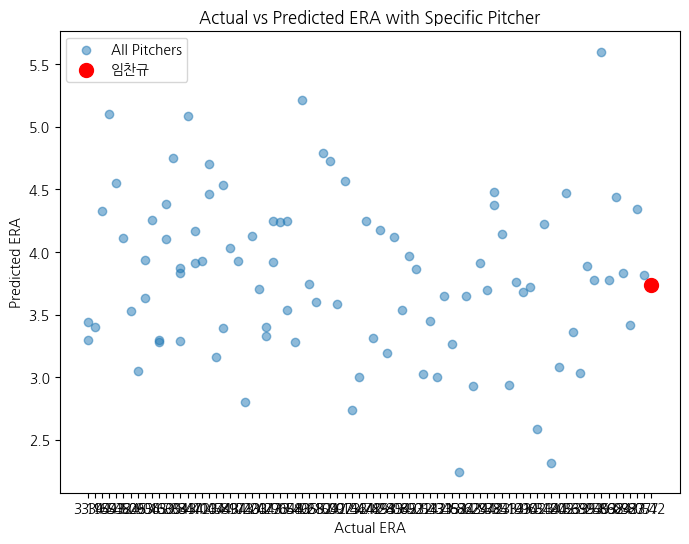

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared Score:", r2_score(y_test, y_pred))


############### 예측할 선발 투수 이름 입력 ###############
target_pitcher_name = '임찬규'

input_pitcher = train_data[train_data['Name'] == target_pitcher_name].tail(1) # train_data에서 마지막 시즌 데이터를 사용

if input_pitcher.empty:
    print(f"Error: No data found for pitcher {target_pitcher_name}.")
else:
    X_input = input_pitcher[['Year', 'Innings Pitched', 'Strikeouts', 'Walks', 'Wins', 'Losses', 'WHIP']]
    X_input['Year'] = X_input['Year'] + 1
    predicted_era = model.predict(X_input)

    # 예측한 ERA 출력
    print(f"Predicted ERA for {target_pitcher_name} in the next season: {predicted_era[0]}")

    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, label='All Pitchers', alpha=0.5)  # 전체 투수
    plt.scatter(input_pitcher['ERA'], predicted_era, color='red', marker='o', s=100, label=target_pitcher_name)  # 특정 투수

    plt.xlabel('Actual ERA')
    plt.ylabel('Predicted ERA')
    plt.title('Actual vs Predicted ERA with Specific Pitcher')
    plt.legend()
    plt.show()



# 특정 선수의 활동 로그 분석



스포키 스탯티즈에서 KT WIZ 고영표 선수의 상세 지표를 크롤링하였다.

In [ ]:
import pandas as pd

url = "https://statiz.sporki.com/player/?m=playlog&p_no=11308"

tables = pd.read_html(url)
print(len(tables), "개의 테이블이 있습니다.")

df = tables[0]


print("데이터프레임 첫 5행 미리보기:")
print(df.head())

print(df.columns)

columns_of_interest = ['Date', 'Team', 'Inning', 'Pitcher', 'Batter', 'BC',
                       'Result', 'Prev', 'Next', 'LEV', 'REs', 'REa', 'WPe', 'WPa']

if all(col in df.columns for col in columns_of_interest):
    df = df[columns_of_interest].dropna()
else:
    print("필요한 열이 테이블에 포함되어 있지 않습니다.")

print("정제된 데이터프레임 첫 5행:")
print(df.head())

1 개의 테이블이 있습니다.
데이터프레임 첫 5행 미리보기:
    Date Team Inning Pitcher Batter       BC      Result         Prev  \
0  09-21  SSG    4회초     고영표  7 이지영  4 (0-2)  2루수 병살타 아웃  무사 1,2루 1:1   
1  08-23  SSG    6회말     고영표  8 이지영  4 (0-2)      낫아웃 삼진    1사 3루 2:2   
2  10-05   LG    4회말     고영표  6 김현수  4 (1-2)    투수 땅볼 아웃  2사 2,3루 2:1   
3  06-30   삼성    5회초     고영표  9 전병우  1 (0-0)  3루수 병살타 아웃    1사 1루 0:1   
4  09-21  SSG    1회초     고영표  2 정준재  2 (0-1)  유격수 병살타 아웃    무사 1루 0:0   

        Next   LEV    REs    REa    WPe    WPa  
0  2사 3루 1:1  2.23  1.635 -1.194  51.4% -0.123  
1  2사 3루 2:2  2.25  1.010 -0.568  56.1% -0.095  
2   이닝종료 2:1  2.71  0.646 -0.646  35.9% -0.080  
3   이닝종료 0:1  1.69  0.611 -0.611  71.0% -0.073  
4     2사 0:0  1.44  1.058 -0.931  53.8% -0.073  
Index(['Date', 'Team', 'Inning', 'Pitcher', 'Batter', 'BC', 'Result', 'Prev',
       'Next', 'LEV', 'REs', 'REa', 'WPe', 'WPa'],
      dtype='object')
정제된 데이터프레임 첫 5행:
    Date Team Inning Pitcher Batter       BC      Result         

## BC에 따른 투구 결과

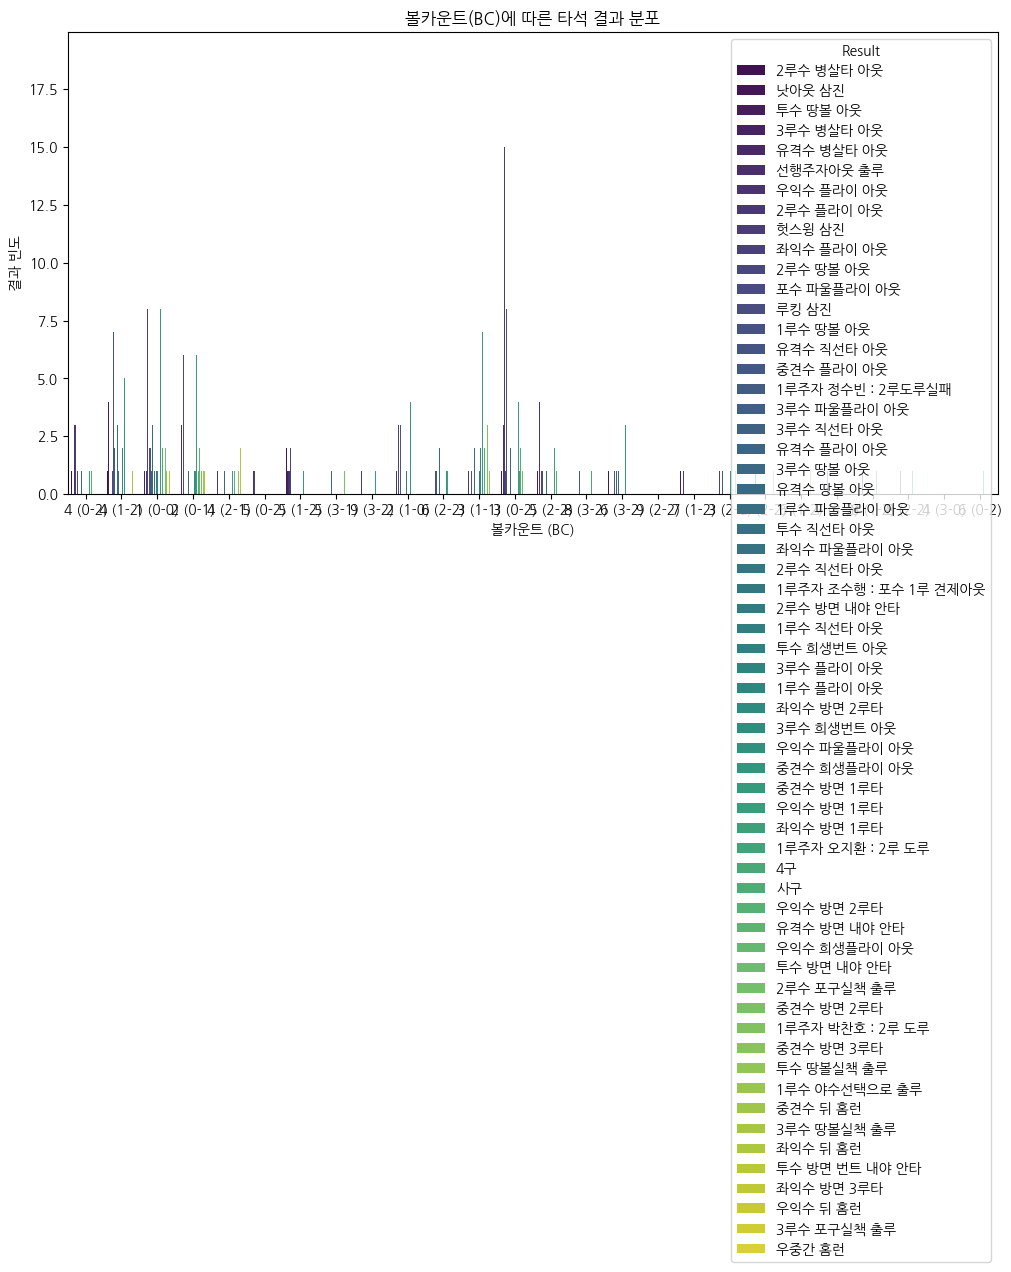

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='BC', hue='Result', palette='viridis')
plt.title("볼카운트(BC)에 따른 타석 결과 분포")
plt.xlabel("볼카운트 (BC)")
plt.ylabel("결과 빈도")
plt.legend(title="Result")
plt.show()


## 투구 전 후에 따른 실점 기대치 변화

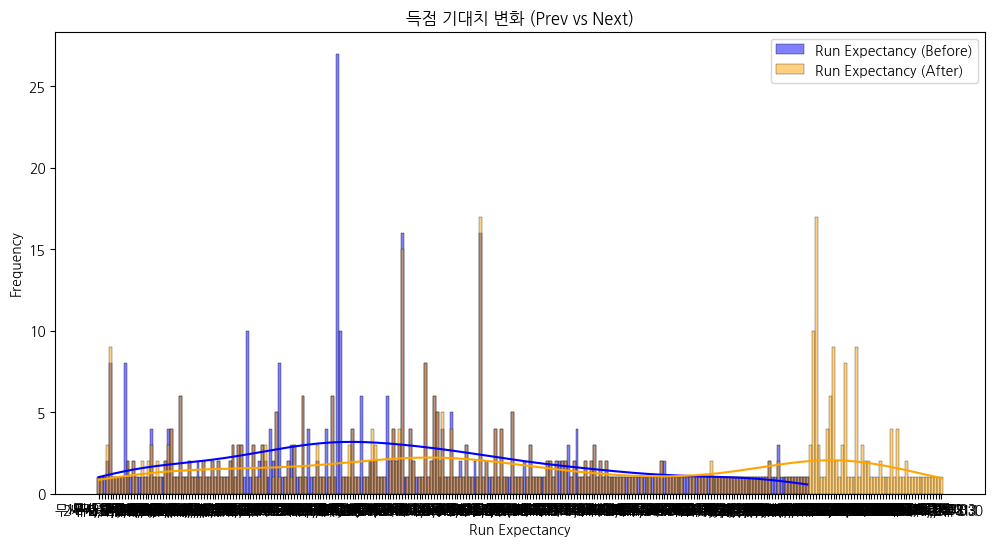

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Prev', color='blue', label='Run Expectancy (Before)', kde=True)
sns.histplot(data=df, x='Next', color='orange', label='Run Expectancy (After)', kde=True)
plt.title("득점 기대치 변화 (Prev vs Next)")
plt.xlabel("Run Expectancy")
plt.ylabel("Frequency")
plt.legend()
plt.show()


## 투구 결과에 따른 LEV

<ipython-input-61-3bc426217395>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Result', y='LEV', palette='coolwarm')


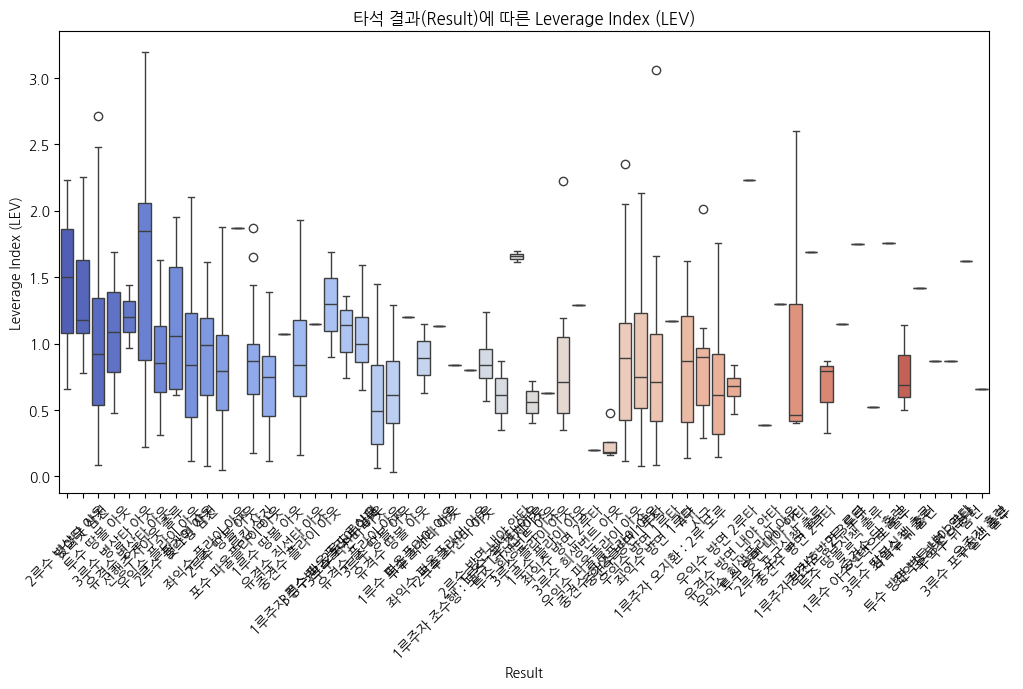

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Result', y='LEV', palette='coolwarm')
plt.title("타석 결과(Result)에 따른 Leverage Index (LEV)")
plt.xlabel("Result")
plt.ylabel("Leverage Index (LEV)")
plt.xticks(rotation=45)
plt.show()


## 투구 결과에 따른 WPA

<ipython-input-62-f921a5110d04>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Result', y='WPa', palette='mako')
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


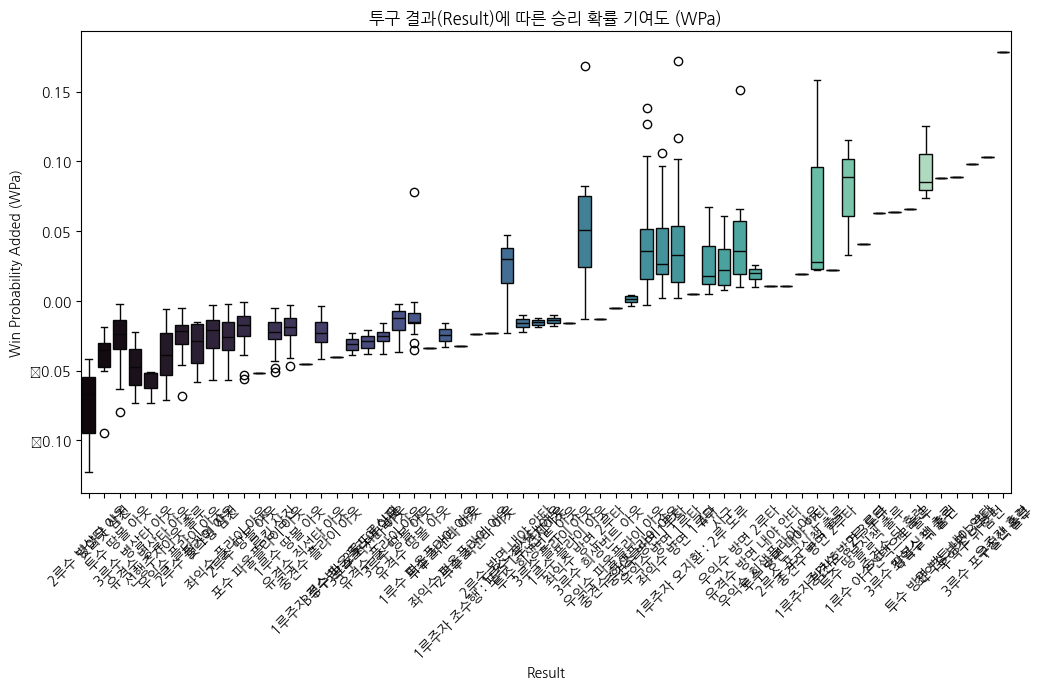

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Result', y='WPa', palette='mako')
plt.title("투구 결과(Result)에 따른 승리 확률 기여도 (WPa)")
plt.xlabel("Result")
plt.ylabel("Win Probability Added (WPa)")
plt.xticks(rotation=45)
plt.show()


# 투구 결과 수치화 후 분석

In [ ]:
import re

def classify_result(result_text):
    """
    Result 문자열을 분석하여 투수 중심의 결과로 분류.
    """
    # 긍정적인 결과
    if "삼진" in result_text:
        return "Strikeout"  # 삼진
    elif "병살" in result_text:
        return "DoublePlay"  # 병살
    elif "땅볼" in result_text or "아웃" in result_text or "플라이" in result_text:
        return "Out"  # 타자 아웃

    # 중립적 결과
    elif "진루" in result_text or "도루" in result_text or "출루" in result_text or "포일" in result_text:
        return "Neutral"  # 주자 진루

    # 부정적인 결과
    elif "안타" in result_text or "2루타" in result_text or "3루타" in result_text:
        return "Hit"  # 안타 또는 장타
    elif "홈런" in result_text:
        return "HomeRun"  # 홈런
    elif "4구" in result_text or "사구" in result_text:
        return "Walk"  # 볼넷
    elif "폭투" in result_text or "보크" in result_text:
        return "Error"  # 폭투 또는 보크

    # 기타 분류되지 않은 경우
    return "Other"

# 새로운 열로 추가
df['Result_Category'] = df['Result'].apply(classify_result)

# 결과 확인
print(df['Result_Category'].value_counts())


Result_Category
Out           225
Other         101
Strikeout      84
Hit            41
Walk           26
DoublePlay      8
Neutral         6
HomeRun         6
Name: count, dtype: int64


## 투구 결과 분포

<ipython-input-64-8908c2b1d9c4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Result_Category', order=df['Result_Category'].value_counts().index, palette="muted")


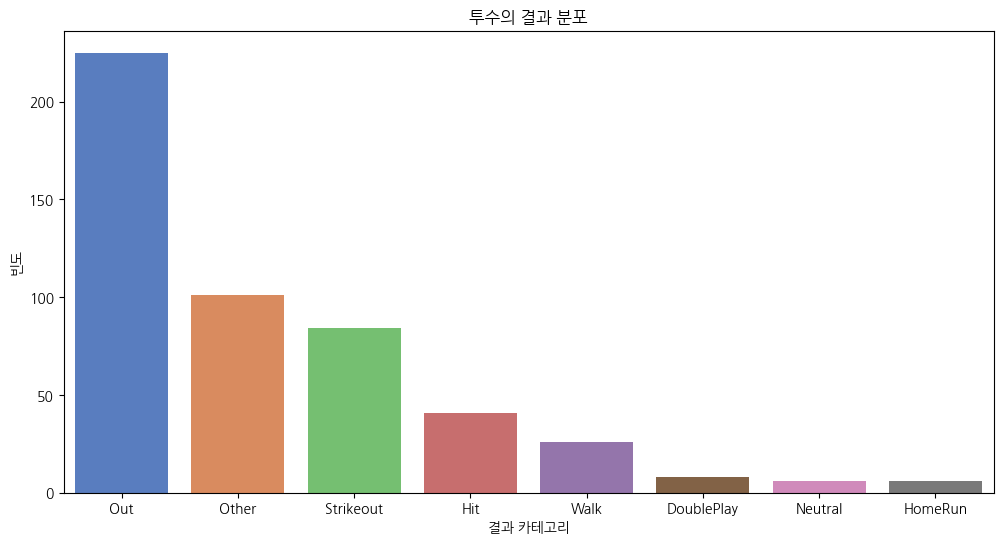

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Result_Category', order=df['Result_Category'].value_counts().index, palette="muted")
plt.title("투수의 결과 분포")
plt.xlabel("결과 카테고리")
plt.ylabel("빈도")
plt.show()


## 투구 결과 수치화

투수가 이뤄낸 승부 결과의 중요도는 코드 작성일 기준 18년 야구팬인 나의 개인적인 주관으로 수치를 적용했다.

In [ ]:
# 'WPe' 열을 숫자로 변환
df['WPe'] = pd.to_numeric(df['WPe'].str.rstrip('%'), errors='coerce') / 100


# 카테고리를 수치형으로 변환
category_mapping = {
    "Strikeout": 1.5,     # 긍정적 결과
    "DoublePlay": 2,  # 긍정적 결과
    "Out": 1,           # 중립적 긍정
    "Neutral": 0,       # 중립적 결과
    "Hit": -1,          # 부정적 결과
    "Walk": -1,       # 부정적 결과
    "Error": -1.5,        # 매우 부정적 결과
    "HomeRun": -2,      # 치명적 부정적 결과
    "Other": 0          # 기타
}

# 수치형 변환
df['Result_Score'] = df['Result_Category'].map(category_mapping)

numeric_columns = ['LEV', 'REs', 'REa', 'WPe', 'WPa', 'Result_Score']
corr_matrix = df[numeric_columns].corr()

## Result_Score 분포

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


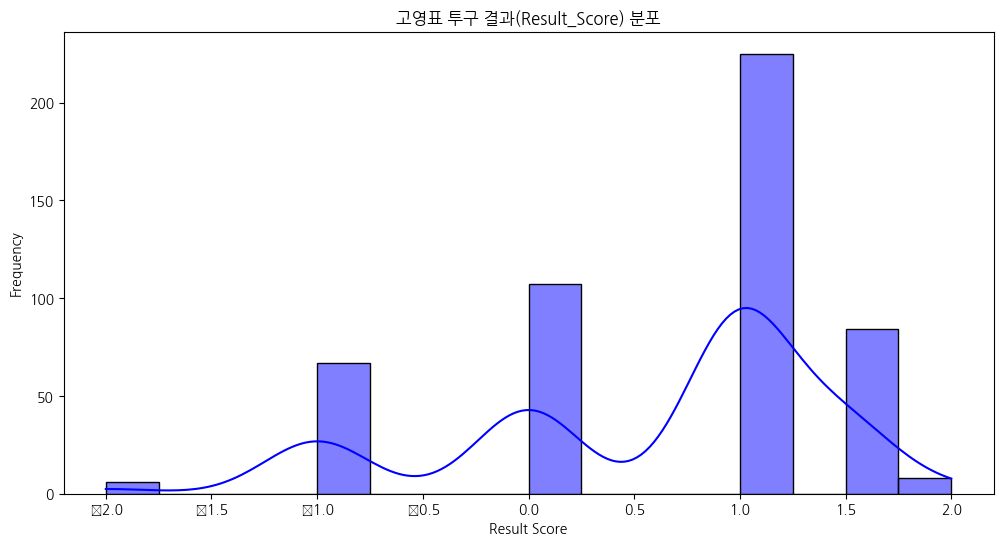

In [ ]:
pitcher_name = df['Pitcher'].iloc[0]
plt.figure(figsize=(12, 6))
sns.histplot(df['Result_Score'], kde=True, color='blue')
plt.title(f"{pitcher_name} 투구 결과(Result_Score) 분포")
plt.xlabel("Result Score")
plt.ylabel("Frequency")
plt.show()

## Result_Score 상관관계

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


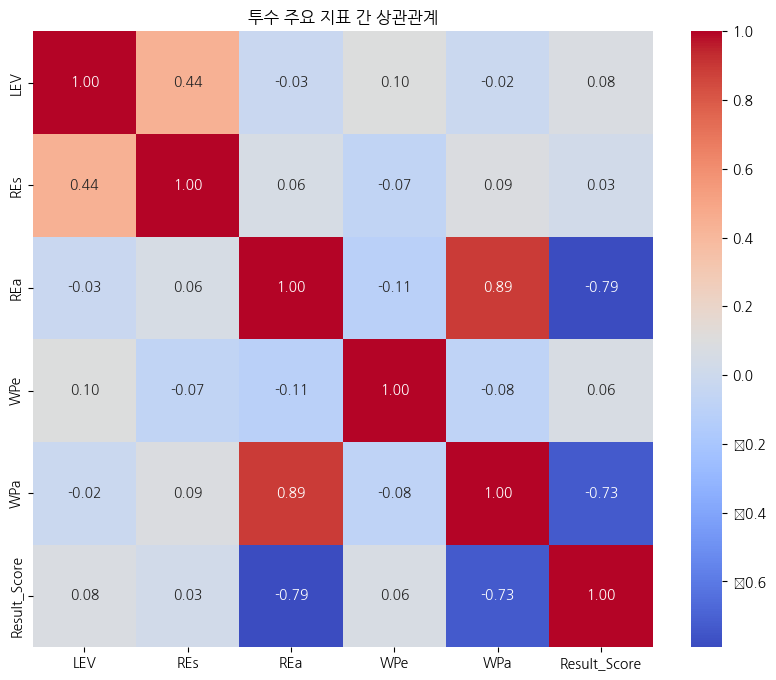

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("투수 주요 지표 간 상관관계")
plt.show()

## LEV와 Result_Score

<ipython-input-68-3f1e71148ccc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='LEV', y='Result_Score', palette='viridis')
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


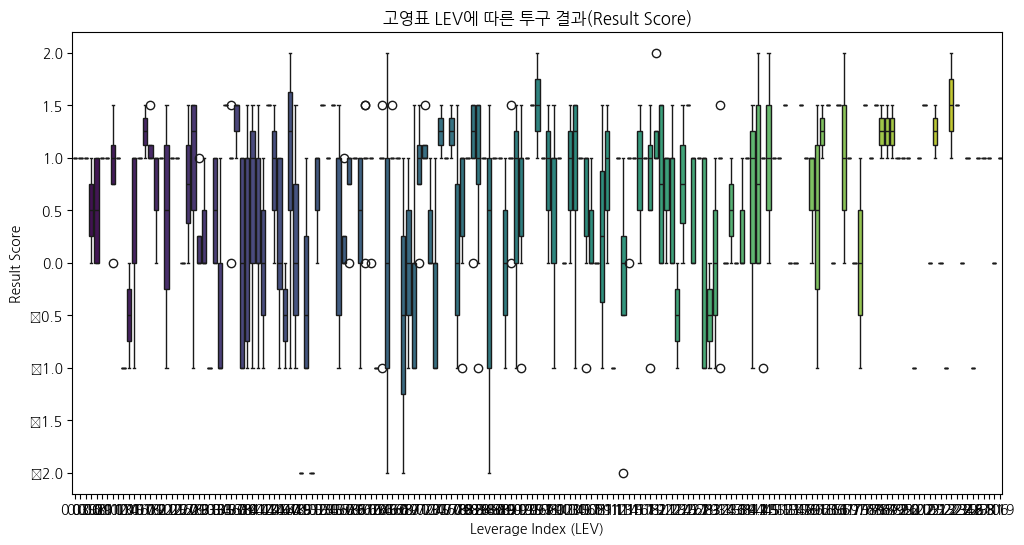

In [ ]:
# LEV에 따른 Result_Score 박스플롯
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='LEV', y='Result_Score', palette='viridis')
plt.title(f"{pitcher_name} LEV에 따른 투구 결과(Result Score)")
plt.xlabel("Leverage Index (LEV)")
plt.ylabel("Result Score")
plt.show()

# 투구 퍼포먼스 예측

## 기본 모델 성능 비교

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

model_scores = {}

models = {
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42),
    'Linear Regression': LinearRegression()
}


# 데이터 분할: 'LEV', 'REs', 'REa', 'WPe', 'WPa'를 사용하여 'Result_Score' 예측
X = df[['LEV', 'REs', 'REa', 'WPe', 'WPa']]
y = df['Result_Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 각 모델을 학습
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # 성능 기록
    model_scores[name] = {'MSE': mse, 'RMSE': rmse, 'R²': r2}
    print(f"{name} 모델 성능:")
    print(f"MSE: {mse:.4f}, RMSE: {rmse:.4f}, R²: {r2:.4f}")
    print("-" * 40)

Random Forest 모델 성능:
MSE: 0.2037, RMSE: 0.4513, R²: 0.7004
----------------------------------------
Gradient Boosting 모델 성능:
MSE: 0.2077, RMSE: 0.4558, R²: 0.6945
----------------------------------------
XGBoost 모델 성능:
MSE: 0.2869, RMSE: 0.5356, R²: 0.5780
----------------------------------------
Linear Regression 모델 성능:
MSE: 0.3403, RMSE: 0.5834, R²: 0.4994
----------------------------------------


## 앙상블

Stacking Ensemble 모델 성능:
MSE: 0.1969, RMSE: 0.4437, R²: 0.7104
----------------------------------------


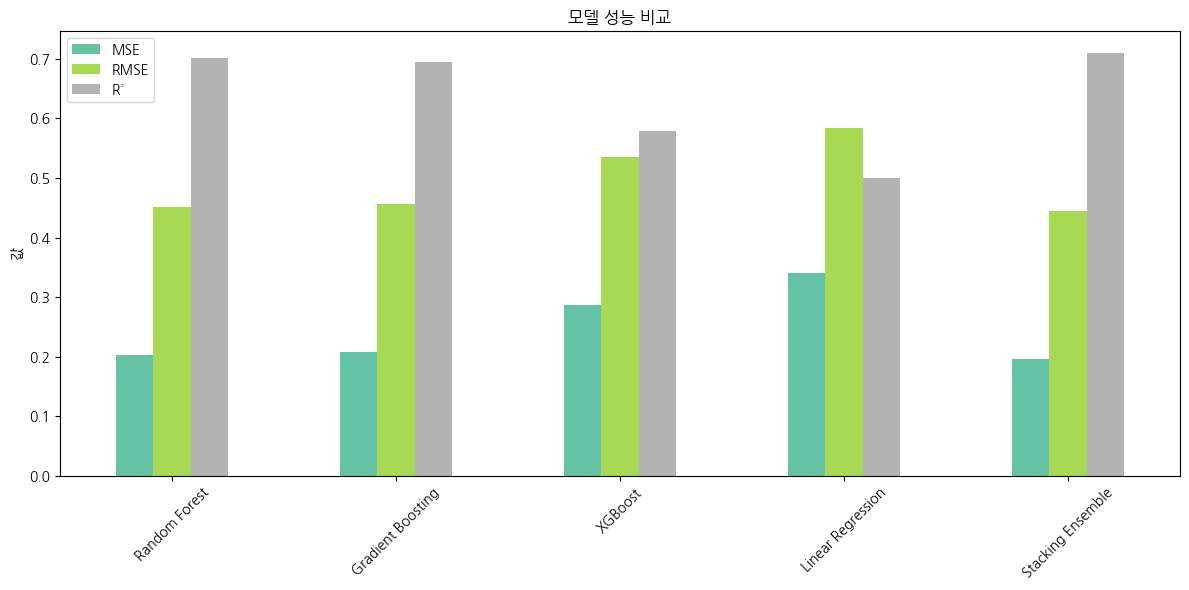

In [ ]:
# 스태킹 모델
stacking_model = StackingRegressor(
    estimators=[('rf', models['Random Forest']), ('gb', models['Gradient Boosting']), ('xgb', models['XGBoost'])],
    final_estimator=LinearRegression()
)

stacking_model.fit(X_train, y_train)
y_pred_stacking = stacking_model.predict(X_test)

mse_stacking = mean_squared_error(y_test, y_pred_stacking)
rmse_stacking = np.sqrt(mse_stacking)
r2_stacking = r2_score(y_test, y_pred_stacking)

model_scores['Stacking Ensemble'] = {'MSE': mse_stacking, 'RMSE': rmse_stacking, 'R²': r2_stacking}

metrics = model_scores['Stacking Ensemble']
print(f"Stacking Ensemble 모델 성능:")
print(f"MSE: {metrics['MSE']:.4f}, RMSE: {metrics['RMSE']:.4f}, R²: {metrics['R²']:.4f}")
print("-" * 40)

# 모델 성능 비교 시각화
model_comparison_df = pd.DataFrame(model_scores).T
model_comparison_df.plot(kind='bar', figsize=(12, 6), colormap='Set2')
plt.title('모델 성능 비교')
plt.ylabel('값')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 타자별 승부 예측

<ipython-input-71-9ecf7167465f>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_predicted_score_by_batter.index, y=avg_predicted_score_by_batter.values, palette='magma')
<ipython-input-71-9ecf7167465f>:14: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


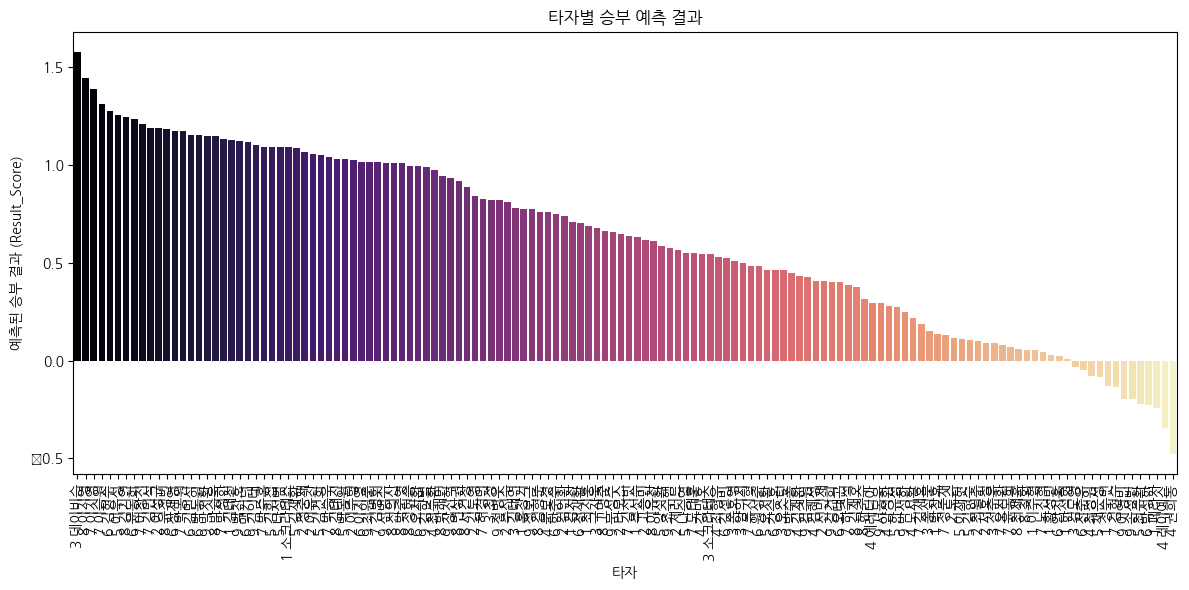

In [ ]:
# 타자별 예측된 승부 결과 시각화
plt.figure(figsize=(12, 6))

df['Predicted_Score'] = stacking_model.predict(df[['LEV', 'REs', 'REa', 'WPe', 'WPa']])

# 타자별 예측된 'Result_Score'의 평균값을 계산하여 시각화
avg_predicted_score_by_batter = df.groupby('Batter')['Predicted_Score'].mean().sort_values(ascending=False)

sns.barplot(x=avg_predicted_score_by_batter.index, y=avg_predicted_score_by_batter.values, palette='magma')
plt.xticks(rotation=90)
plt.title('타자별 승부 예측 결과')
plt.xlabel('타자')
plt.ylabel('예측된 승부 결과 (Result_Score)')
plt.tight_layout()
plt.show()



#결론

이 프로젝트에서는 KBO 리그 투수 데이터를 분석하여 다양한 머신러닝 모델을 활용한 ERA 예측과 타자별 승부 결과의 시각화를 진행하였다.양한 접근법을 비교한 결과, 스태킹 앙상블 모델이 가장 높은 예측 정확도를 보여주었다. 투수와 타자의 맞대결 데이터를 활용해 특정 상황에서의 승부를 예측도 하였다. 이러한 분석은 구단 입장과 선수 입장에서 팀의 경기 전략을 개선하고 상대 선수에 대한 효율적인 대비책을 마련하는 데 기여할 수 있다. <br>
이번 프로젝트에서는 투수의 역량을 기반으로 했지만, 타격 데이터를 포함한 다양한 데이터를 융합한다면 전체적인 경기 성과를 예측하는 모델로 확장할 수 있을 것이라고 생각된다.